In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### outilers are the extreme values

### Detetcton of Outlier(Various ways of finding the outlier.)
#### Some of the most popular methods for outlier detection are:
    
- Z-Score or Extreme Value Analysis (parametric)

- using the IQR interquantile range

- Probabilistic and Statistical Modeling (parametric)

- Linear Regression Models (PCA, LMS)

- Proximity Based Models (non-parametric)

- Information Theory Models

- High Dimensional Outlier Detection Methods (high dimensional sparse data)

## we find the outliers also with visualization techniques they are scatter plot and box plot

In [2]:
data = pd.read_csv(r"D:\Ineuron\Libraries for Manipulation and visualization\Dataset\adult.data",header = None)

In [3]:
data.columns=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]

In [4]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [6]:
data.shape

(32561, 15)

In [7]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
marital-status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
data_col =  [fea for fea in data.columns if data[fea].dtypes == 'O']

In [11]:
data_col

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

In [12]:
data_num =  [fea for fea in data.columns if data[fea].dtypes != 'O']

In [13]:
data_num

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

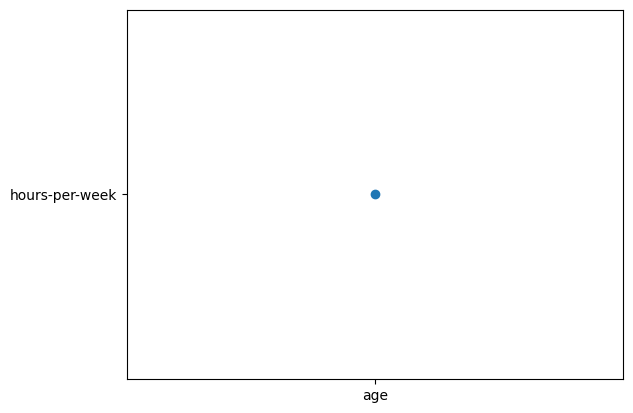

In [14]:
plt.scatter('age','hours-per-week')

In [15]:
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
data['class'].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

In [17]:
data[data_col].describe()


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,class
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [18]:
data[data_num].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<Axes: xlabel='age', ylabel='hours-per-week'>

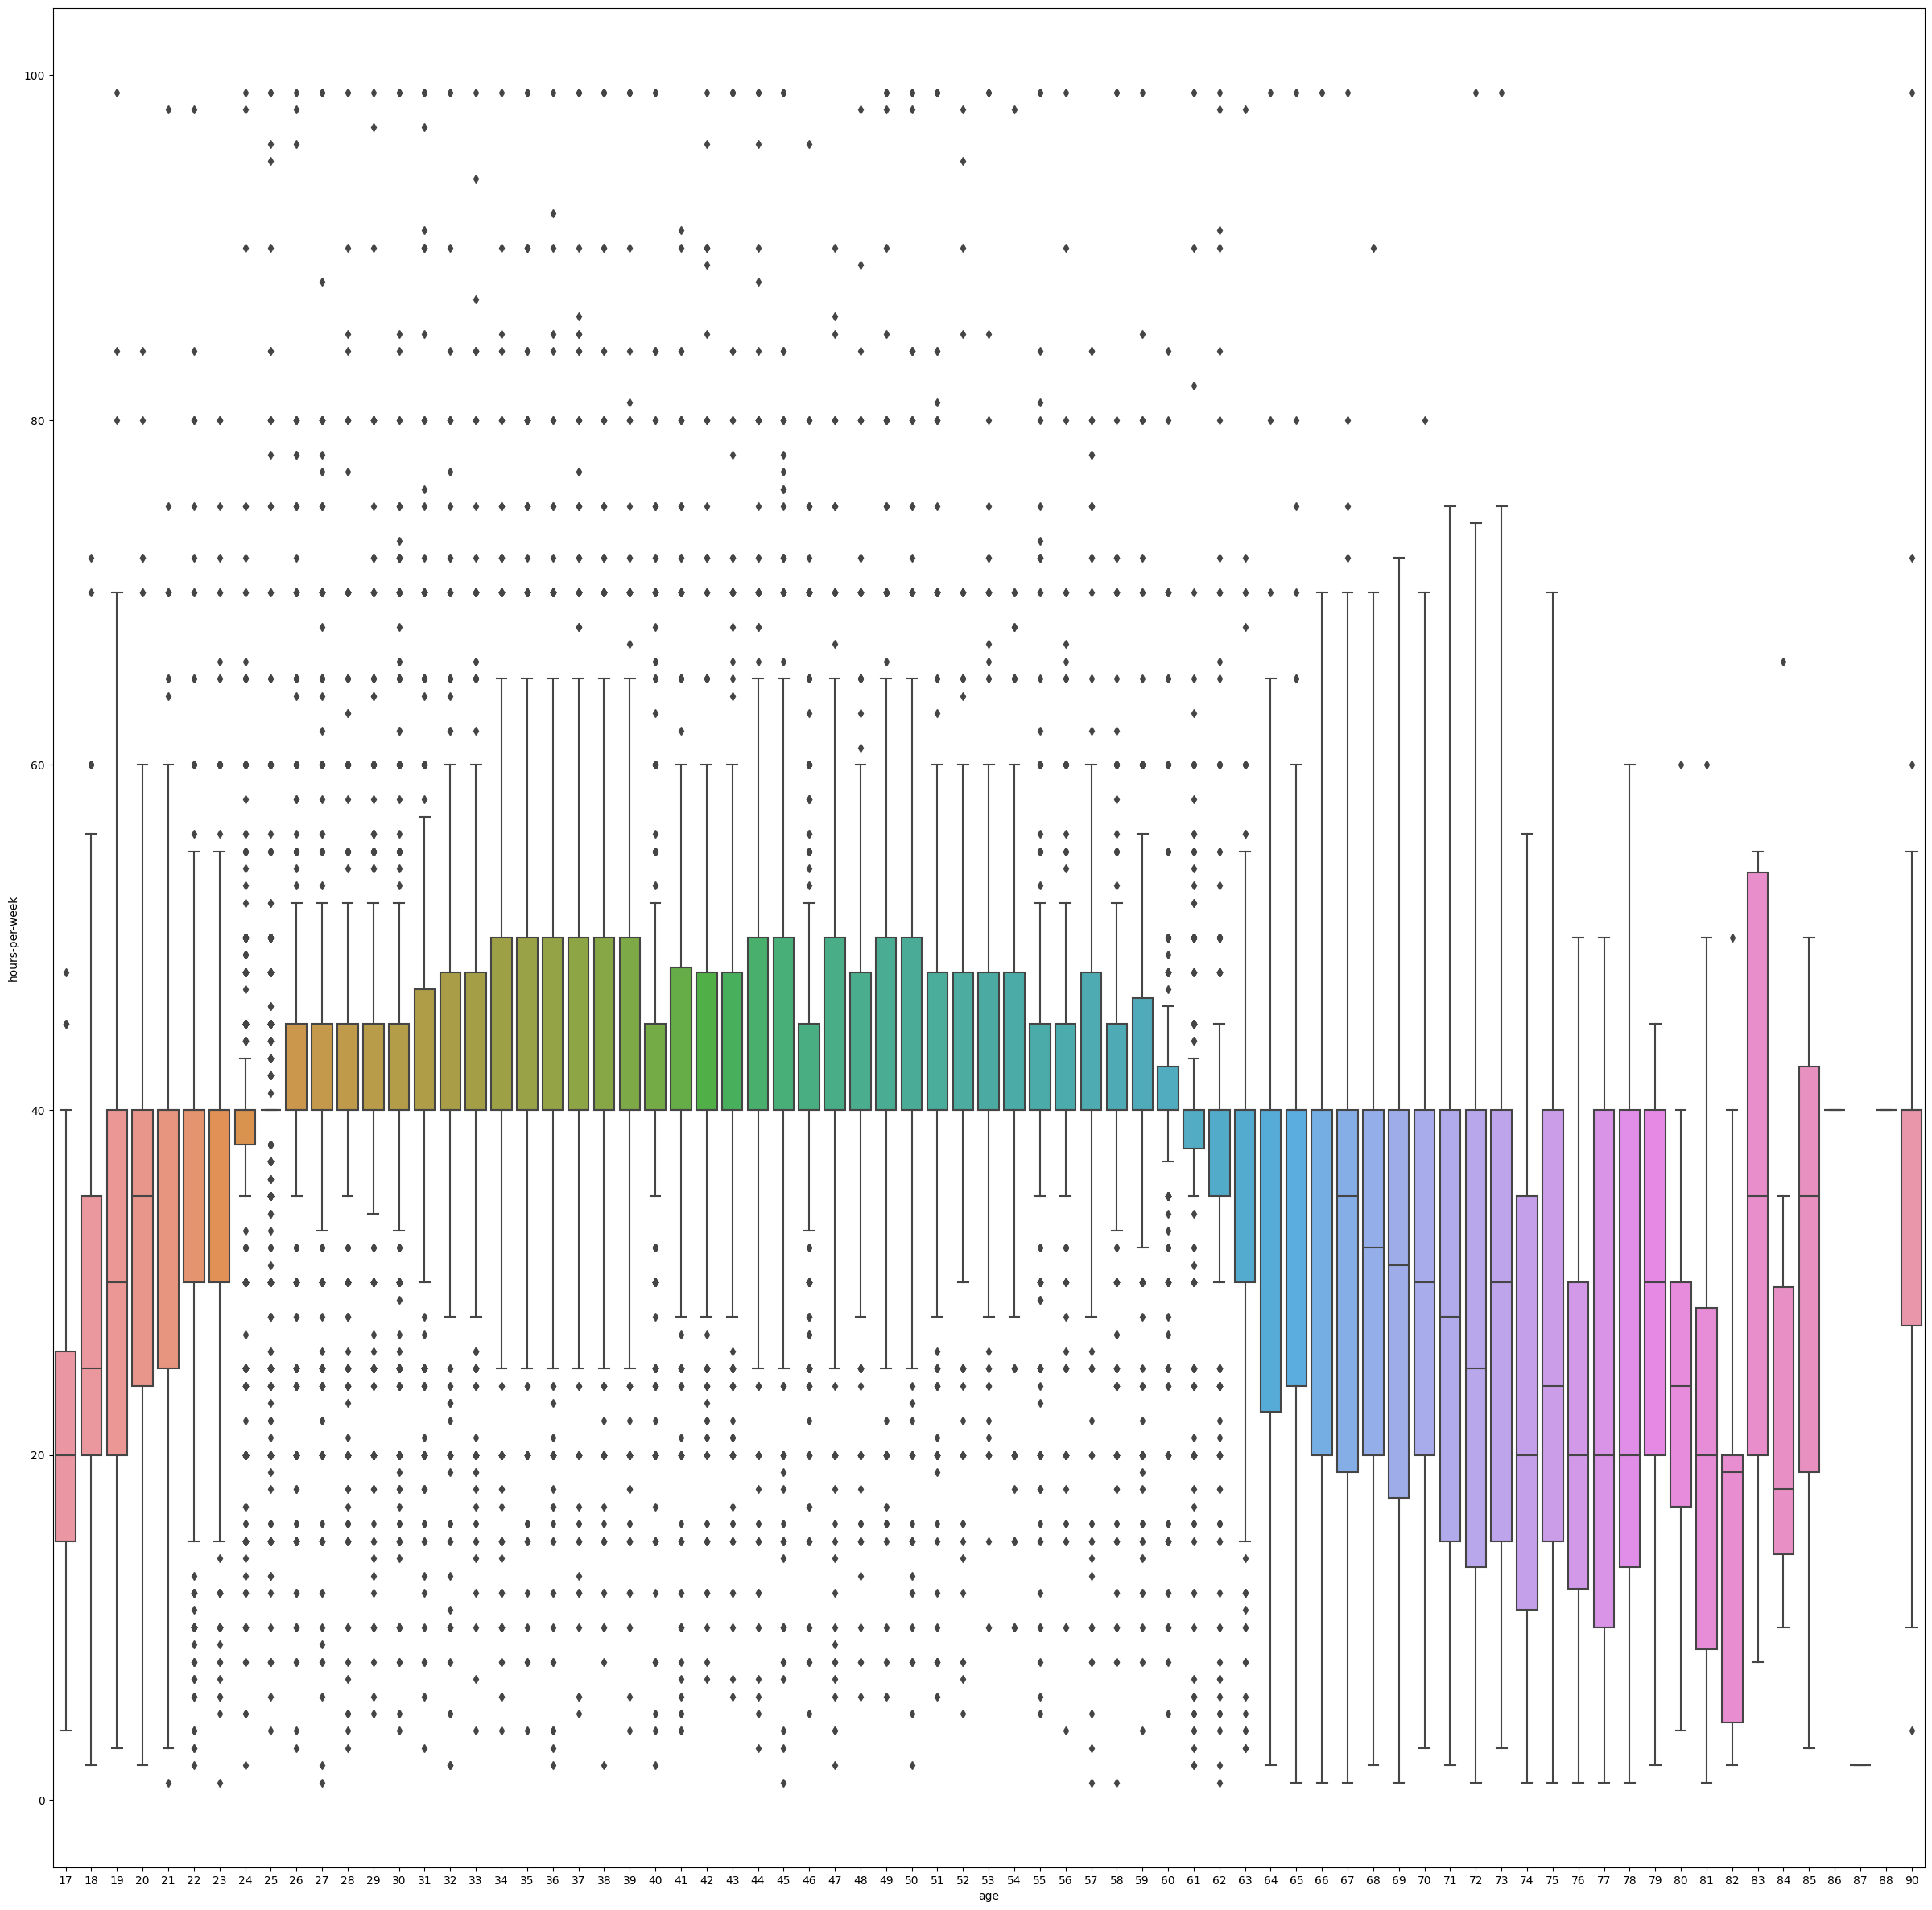

In [19]:
plt.figure(figsize=(30,30))
sns.boxplot(x='age',y='hours-per-week',data=data)

In [20]:
## see in this plot,lot of outliers was found.

<Axes: >

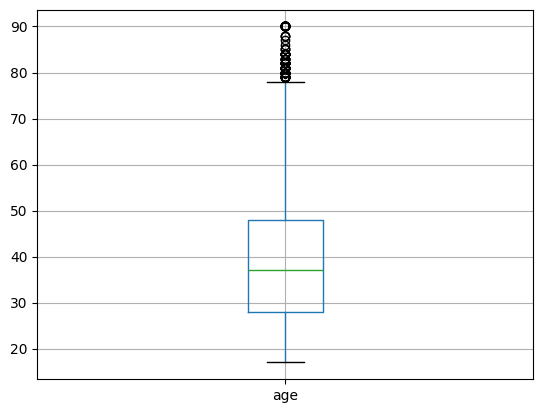

In [21]:
data.boxplot(column="age")

In [22]:
# see this boxplot describe the age coulmn,80 to 90 was the outlier.

<Axes: >

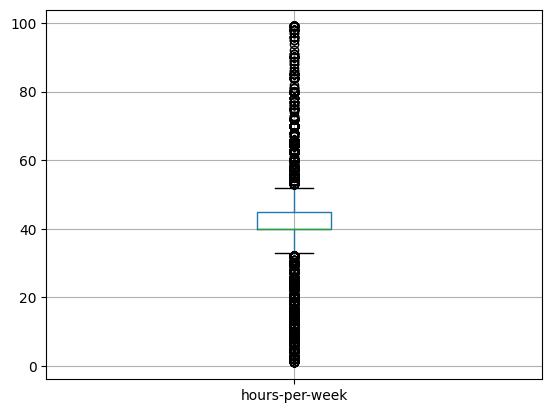

In [23]:
data.boxplot(column="hours-per-week")

In [24]:
## in this plot hours-per-week columns getting both lower_boundry and upper_boundry was huge,they are to many extrme values.

<Axes: >

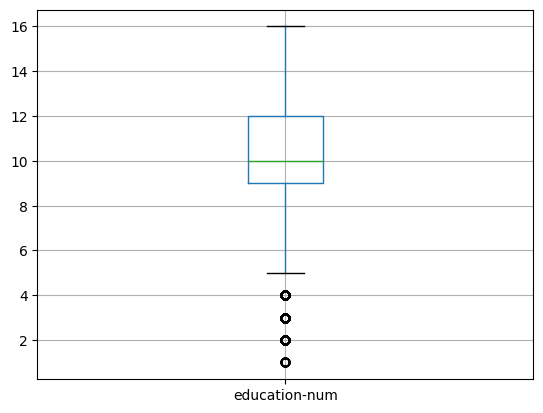

In [25]:
data.boxplot(column="education-num")

In [26]:
data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [27]:
data['education-num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [28]:
data['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [29]:
data[['age',"education-num","hours-per-week"]].mean()

age               38.581647
education-num     10.080679
hours-per-week    40.437456
dtype: float64

In [30]:
3*data[['age',"education-num","hours-per-week"]].std()

age               40.921298
education-num      7.718161
hours-per-week    37.042286
dtype: float64

## age

In [31]:
upper_boundry = data['age'].mean() + 3* data['age'].std()

In [32]:
lower_boundry = data['age'].mean() - 3* data['age'].std()

In [33]:
print("upper_boundry",upper_boundry)
print("lower_boundry",lower_boundry)
print("mean",data['age'].mean())
print("max:",max(data['age']))
print("min:",min(data['age']))

upper_boundry 79.50294441606422
lower_boundry -2.3396509054226513
mean 38.58164675532078
max: 90
min: 17


In [34]:
## This lower and upper boundary for age data

## education-num

In [35]:
upper_boundry = data['education-num'].mean() + 3* data['education-num'].std()
lower_boundry = data['education-num'].mean() - 3* data['education-num'].std()
print("upper_boundry",upper_boundry)
print("lower_boundry",lower_boundry)
print("mean",data['education-num'].mean())
print("max:",max(data['education-num']))
print("min:",min(data['education-num']))

upper_boundry 17.798840336517124
lower_boundry 2.362518344113079
mean 10.0806793403151
max: 16
min: 1


## hours-per-week

In [36]:
upper_boundry = data['hours-per-week'].mean() + 3* data['hours-per-week'].std()
lower_boundry = data['hours-per-week'].mean() - 3* data['hours-per-week'].std()
print("upper_boundry",upper_boundry)
print("lower_boundry",lower_boundry)
print("mean",data['hours-per-week'].mean())
print("max:",max(data['hours-per-week']))
print("min:",min(data['hours-per-week']))

upper_boundry 77.47974189728542
lower_boundry 3.3951698069005687
mean 40.437455852092995
max: 99
min: 1


In [37]:
data[data_num].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0, 0.5, 'age')

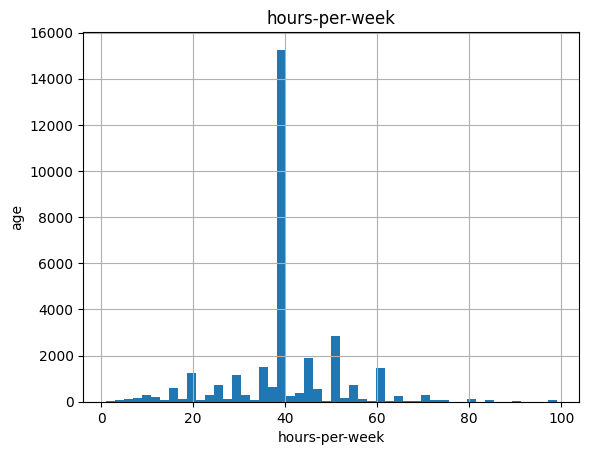

In [38]:
figure = data['hours-per-week'].hist(bins=50)
figure.set_title('hours-per-week')
figure.set_xlabel('hours-per-week')
figure.set_ylabel('age')

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

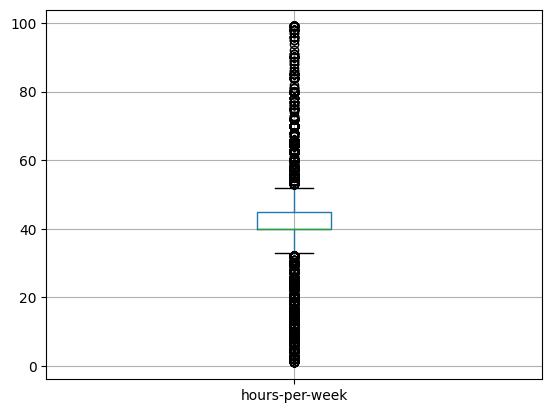

In [39]:
data.boxplot(column="hours-per-week")
data['hours-per-week'].describe()

In [40]:
data['hours-per-week'].quantile(0.75)

45.0

In [41]:
data['hours-per-week'].quantile(0.25)

40.0

In [42]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=data['hours-per-week'].quantile(0.75)-data['hours-per-week'].quantile(0.25)

In [43]:
IQR

5.0

In [44]:
lower_bridge=data['hours-per-week'].quantile(0.25)-(IQR*1.5)

In [45]:
upper_bridge=data['hours-per-week'].quantile(0.75)+(IQR*1.5)

In [46]:
lower_bridge

32.5

In [47]:
upper_bridge

52.5

In [48]:
#Extreme outilers
lower_bridge=data['hours-per-week'].quantile(0.25)-(IQR*3)
upper_bridge=data['hours-per-week'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

25.0
60.0


## Z-SCORE

#### z-socre= data-mean/std

34


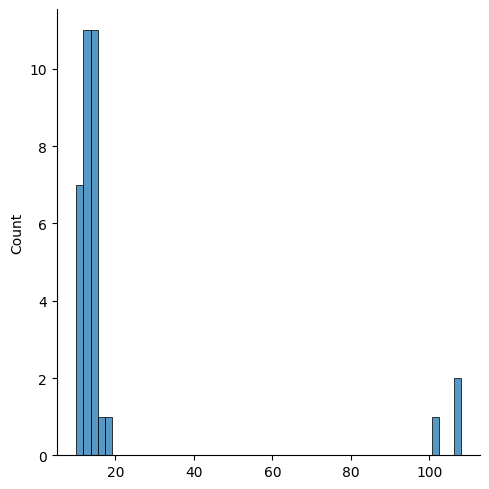

In [79]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]
mean = np.mean(dataset)
std = np.std(dataset)
print(len(dataset))
sns.displot(dataset,kde=False)

In [51]:
z  = (dataset - mean)/std

[0.38587723 0.4237958  0.34795866 0.27212152 0.34795866 0.23420294
 0.27212152 0.31004009 0.23420294 3.06471282 0.34795866 0.27212152
 0.1583658  0.08252866 3.25430567 0.4237958  0.31004009 0.34795866
 0.27212152 0.34795866 3.29222425 0.34795866 0.38587723 0.27212152
 0.31004009 0.23420294 0.4237958  0.23420294 0.34795866 0.4237958
 0.27212152 0.31004009 0.23420294 0.4237958 ]
34


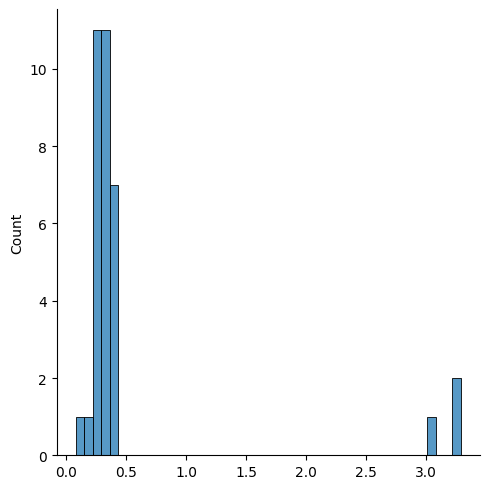

In [78]:
y = np.abs(z)
print(y)
print(len(y))
sns.displot(y,kde = False)

In [53]:
outliers= []
threshold= 3
for i in y:
    if i > threshold:
        outliers.append(i)

In [54]:
print(outliers)

[3.064712815114584, 3.254305674856025, 3.292224246804313]


## InterQuantile Range
## 75%- 25% values in a dataset
## Steps
### Arrange the data in increasing order
### Calculate first(q1) and third quartile(q3)
### Find interquartile range (q3-q1)
### Find lower bound q1*1.5
### Find upper bound q3*1.5

In [55]:
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

{'whiskers': [<matplotlib.lines.Line2D at 0x1467f87b400>,
 'caps': [<matplotlib.lines.Line2D at 0x1467f87b970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1467f87b160>],
 'medians': [<matplotlib.lines.Line2D at 0x1467f988b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1467f9b7af0>],
 'means': []}

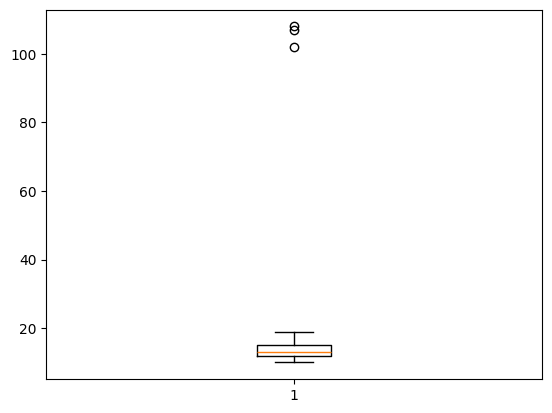

In [56]:
plt.boxplot(dataset)

In [57]:
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [58]:
q1,q3 = np.percentile(dataset,[25,75])

In [59]:
print("q1:",q1)
print("q3:",q3)

q1: 12.0
q3: 15.0


In [60]:
iqr = q3 - q1
print("iqr:",iqr)

iqr: 3.0


In [61]:
lower_boundry_IR = q1 - (iqr*1.5) 
upper_boundry_IR = q3 + (iqr*1.5)

In [62]:
print("lower_boundry_IR:",lower_boundry_IR)
print("upper_boundry_IR:",upper_boundry_IR)

lower_boundry_IR: 7.5
upper_boundry_IR: 19.5


In [63]:
lower_bound_val = q1 -(1.5 * iqr) 
upper_bound_val = q3 +(1.5 * iqr) 

In [64]:
print(lower_bound_val,upper_bound_val)

7.5 19.5


In [65]:
# identify outliers
outliers = [x for x in dataset if x < lower_boundry_IR or x > upper_boundry_IR]
print(outliers)

[102, 107, 108]


In [98]:
from numpy import percentile
# calculate interquartile range
q25, q75 = percentile(dataset, 25), percentile(dataset, 75)
#print(q25,q75)
iqr = q75 - q25
#print(iqr)
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
#print(cut_off)
lower, upper = q25 - cut_off, q75 + cut_off
#print(lower,upper)
# identify outliers
outliers = [x for x in dataset if x <= lower or x >= upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in dataset if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=12.000, 75th=15.000, IQR=3.000
Identified outliers: 3
Non-outlier observations: 31


#### 1. Z-Score or Extreme Value Analysis (parametric)

The z-score or standard score of an observation is a metric that indicates how many standard deviations a data point is from the sample’s mean, assuming a gaussian distribution.

 This makes z-score a parametric method. Very frequently data points are not to described by a gaussian distribution, this problem can be solved by applying transformations to data ie: scaling it.
Some Python libraries like Scipy and Sci-kit Learn have easy to use functions and classes for a easy implementation along with Pandas and Numpy.

After making the appropriate transformations to the selected feature space of the dataset, the z-score of any data point can be calculated with the following expression:

![Z%20score.png](attachment:Z%20score.png)

When computing the z-score for each sample on the data set a threshold must be specified. Some good ‘thumb-rule’ thresholds can be: 2.5, 3, 3.5 or more standard deviations.

In [110]:
import numpy as np

data_zscore_tec = [10,15,20,25,30,10,12,150,20,10,5,-100,90]

mean = np.mean(data_zscore_tec)
std = np.std(data_zscore_tec)

threshold = 2

outlers = []

for i in data_zscore_tec:
    Zscore = (i - mean)/std
    if abs(Zscore) > threshold:
        outlers.append(i)

print(outlers)

[150, -100]


### DBSCAN

In [111]:
# data wrangling
import pandas as pd# visualization
import matplotlib.pyplot as plt# algorithm
from sklearn.cluster import DBSCAN

In [112]:
# import data
df = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [113]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
model =dbscan.fit(df[["sepal_length", "sepal_width"]])

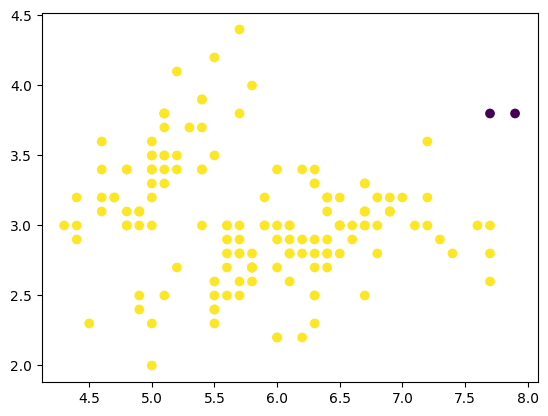

In [114]:
# visualize outputs
colors = model.labels_
plt.scatter(df["sepal_length"], df["sepal_width"], c = colors)

In [118]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=2)
nbrs = neighb.fit(df[["sepal_length", "sepal_width"]])
distances, indices = nbrs.kneighbors(df[["sepal_length", "sepal_width"]])

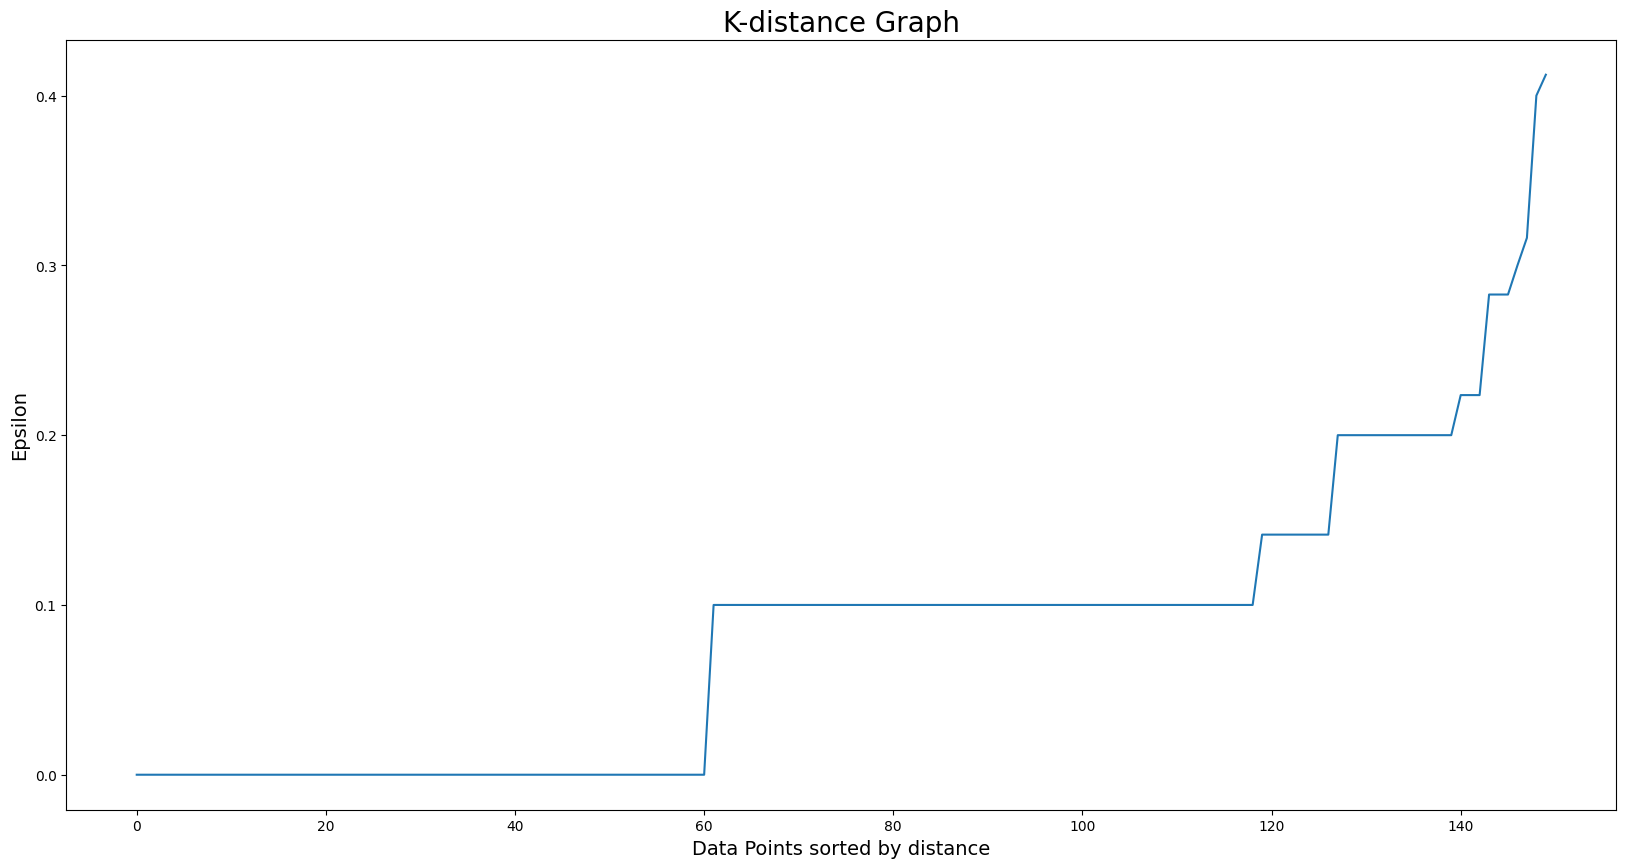

In [116]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [125]:
# input data
data = df[["sepal_length", "sepal_width"]]# specify & fit model
model = DBSCAN(eps = 0.4, min_samples = 10).fit(data)

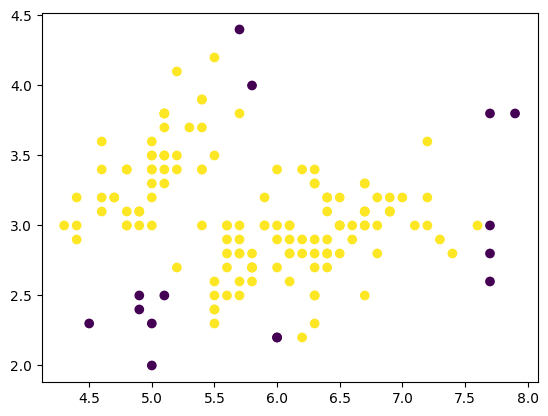

In [126]:
# visualize outputs
colors = model.labels_
plt.scatter(data["sepal_length"], data["sepal_width"], c = colors)

In [127]:
# outliers dataframe
outliers = data[model.labels_ == -1]
print(outliers)

     sepal_length  sepal_width
14            5.8          4.0
15            5.7          4.4
41            4.5          2.3
57            4.9          2.4
60            5.0          2.0
62            6.0          2.2
93            5.0          2.3
98            5.1          2.5
106           4.9          2.5
117           7.7          3.8
118           7.7          2.6
119           6.0          2.2
122           7.7          2.8
131           7.9          3.8
135           7.7          3.0


 LOF where the difference between outlier detection and novelty detection comes into play.

The Elliptic Envelope should only be used with data that satisfy the assumption of normality.

The One-class SVM is not very good for outlier detection, but the best option for novelty detection when the training data is not much polluted with outliers.

The most important hyperparameter in the Elliptic Envelope, Isolation Forest and LOF is the contamination hyperparameter.

It represents the proportion of outliers in the dataset. In most cases, we do not know the exact value for the contamination hyperparameter. The best way to guess the value is that first do IQR-based detection and count the number of outliers in the dataset. As you know the total of observations, you can get an approximate value for the proportion of outliers. This is the value for the contamination hyperparameter!

In [142]:
df = read_csv("D:\Ineuron\Libraries for Manipulation and visualization\Dataset\housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [156]:
data = df.drop('Address',axis=1)

In [157]:
data1 = data.values

In [159]:
data1

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04, 1.05903356e+06],
       [7.92486424e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04, 1.50589092e+06],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04, 1.05898799e+06],
       ...,
       [6.33906869e+04, 7.25059062e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04, 1.03072958e+06],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04, 1.19865687e+06],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04, 1.29895048e+06]])

In [166]:
X

array([[7.95454586e+04, 5.68286132e+00, 7.00918814e+00, 4.09000000e+00,
        2.30868005e+04],
       [7.92486424e+04, 6.00289981e+00, 6.73082102e+00, 3.09000000e+00,
        4.01730722e+04],
       [6.12870672e+04, 5.86588984e+00, 8.51272743e+00, 5.13000000e+00,
        3.68821594e+04],
       ...,
       [6.33906869e+04, 7.25059062e+00, 4.80508098e+00, 2.13000000e+00,
        3.32661455e+04],
       [6.80013312e+04, 5.53438842e+00, 7.13014386e+00, 5.44000000e+00,
        4.26256202e+04],
       [6.55105818e+04, 5.99230531e+00, 6.79233610e+00, 4.07000000e+00,
        4.65012838e+04]])

In [165]:
y

array([1059033.558, 1505890.915, 1058987.988, ..., 1030729.583,
       1198656.872, 1298950.48 ])

In [164]:
# load and summarize the dataset
from pandas import read_csv
from sklearn.model_selection import train_test_split
# load the dataset
df = read_csv("D:\Ineuron\Libraries for Manipulation and visualization\Dataset\housing.csv")
# retrieve the array
data = df.values
# split into input and output elements
X, y = data1[:, :-1], data1[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5000, 5) (5000,)
(3350, 5) (1650, 5) (3350,) (1650,)


In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics  import mean_absolute_error
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 82503.949


In [171]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [175]:
# evaluate model on training dataset with outliers removed
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
# load the dataset
df = read_csv("D:\Ineuron\Libraries for Manipulation and visualization\Dataset\housing.csv")
# retrieve the array
data = df.values
# split into input and output elements
X, y = data1[:, :-1], data1[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(3350, 5) (3350,)
(3315, 5) (3315,)
MAE: 82514.249


In [176]:
from numpy import percentile
# calculate interquartile range
q25, q75 = percentile(data1, 25), percentile(data1, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data1 if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data1 if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=5.907, 75th=68812.485, IQR=68806.578


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [44]:
import numpy as np
#a = np.array('0,2,0', [1,2,3], [4,5,6])
np.r_['0,2,0', [1,2,3], [4,5,6]]

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])